In [2]:
%matplotlib inline
import pandas as pd
import numpy as np

In [3]:
baseurl = "https://raw.githubusercontent.com/wesm/pydata-book/master/ch02/names/yob{}.txt"

years = range(1880, 2011)

pieces = []
columns = [ 'name', 'sex', 'births' ]

for year in years:
    url = baseurl.format(year)
    frame = pd.read_csv(url, names = columns)
    
    frame['year'] = year
    pieces.append(frame)
    
names = pd.concat(pieces, ignore_index = True)

In [4]:
names.head()

,name,sex,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [5]:
total_births = names.pivot_table(values = 'births', index = 'year', columns = 'sex', aggfunc = 'sum')

In [6]:
total_births.tail()

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


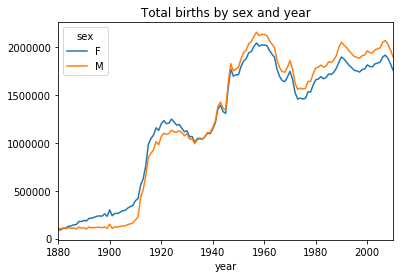

In [9]:
total_births.plot(title = "Total births by sex and year")

In [10]:
def add_prof(group):
    births = group.births.astype(float)
    group['prop'] = births / births.sum()
    return group

names = names.groupby(['year', 'sex']).apply(add_prof)

In [11]:
names.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [12]:
np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

True

In [13]:
def get_top1000(group):
    return group.sort_values(by = 'births', ascending = False)[:1000]

grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
top1000.index = np.arange(len(top1000))
top1000.head()

,name,sex,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188


In [14]:
boys = top1000[top1000.sex == 'M']

In [15]:
girs = top1000[top1000.sex == 'F']

In [16]:
total_births = top1000.pivot_table(values = 'births', index = 'year', columns = 'name', aggfunc = 'sum')

In [17]:
subset = total_births[['John', 'Ian', 'Mary', 'Eve', 'Tom', 'Lucy']]

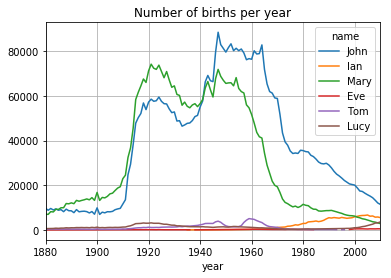

In [20]:
#subset.plot(subplots = True, figsize = (12, 10), grid = False, title = 'Number of births per year')
subset.plot(grid = True, title = 'Number of births per year')

In [25]:
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'

table = names.pivot_table(values = 'births', index = last_letters, columns = ['sex', 'year'], aggfunc=sum)

In [43]:
subtable = table.reindex(columns = [1930, 1960, 2010], level = 'year')
subtable.head()

sex                 F                             M                    
year             1930      1960      2010      1930      1960      2010
last_letter                                                            
a            288291.0  691247.0  670605.0    3566.0    5204.0   28438.0
b                20.0     694.0     450.0    3019.0    3912.0   38859.0
c                14.0      49.0     946.0    1784.0   15476.0   23125.0
d             12124.0    3729.0    2607.0  183033.0  262112.0   44398.0
e            305386.0  435013.0  313833.0  131778.0  178823.0  129012.0

In [55]:
subtable.sum()

sex  year
F    1930    1125521.0
     1960    2022062.0
     2010    1759010.0
M    1930    1096663.0
     1960    2132588.0
     2010    1898382.0
dtype: float64

In [44]:
letter_prop = subtable/subtable.sum().astype(float)

In [45]:
letter_prop.head()

sex                 F                             M                    
year             1930      1960      2010      1930      1960      2010
last_letter                                                            
a            0.256140  0.341853  0.381240  0.003252  0.002440  0.014980
b            0.000018  0.000343  0.000256  0.002753  0.001834  0.020470
c            0.000012  0.000024  0.000538  0.001627  0.007257  0.012181
d            0.010772  0.001844  0.001482  0.166900  0.122908  0.023387
e            0.271329  0.215133  0.178415  0.120163  0.083853  0.067959

In [46]:
import matplotlib.pyplot as plt

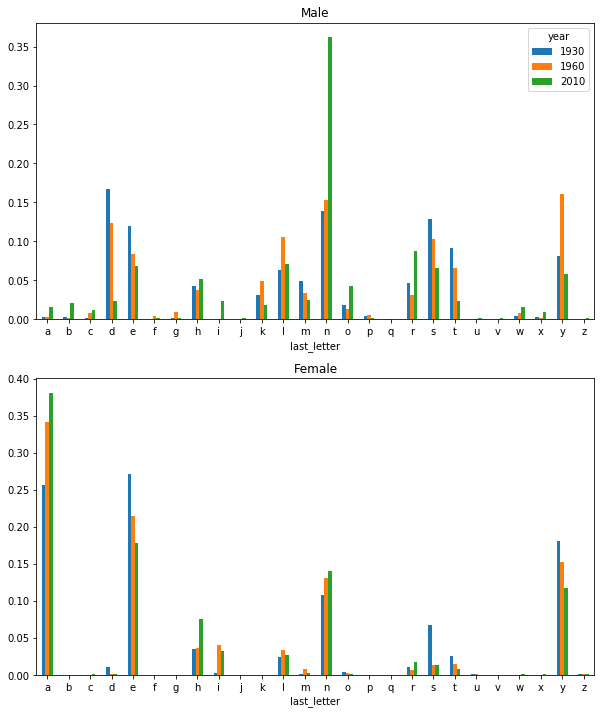

In [51]:
fig, axes = plt.subplots(2, 1, figsize = (10, 12))
letter_prop['M'].plot(kind = 'bar', rot = 0, ax = axes[0], title = 'Male')
letter_prop['F'].plot(kind = 'bar', rot = 0, ax = axes[1], title = 'Female', legend = False)